In [2]:

import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline



In [46]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM', 'BAC', 'LMT']

end_date = datetime.now()
start_date = end_date - \
            timedelta(days=1095) # 3 years of data

tickers = yf.download(tickers, start = start_date, end = end_date,auto_adjust=False)['Adj Close']
tickers = pd.DataFrame(tickers)

[*********************100%***********************]  7 of 7 completed


In [47]:
returns = tickers.pct_change()*100 # Calculate daily returns and drop NaN values
returns = returns.dropna() # Drop NaN values

In [48]:
# Calculate the mean and variance of the returns
mean_returns = returns.mean() # Mean returns
variance_returns = returns.var() # Variance of returns

In [49]:
# Correlation matrix
returns.corr()

Ticker,AAPL,AMZN,BAC,GOOGL,JPM,LMT,MSFT
Ticker,,,,,,,
AAPL,1.000000,0.555852,0.353639,0.592580,0.337481,0.124099,0.653450
AMZN,0.555852,1.000000,0.361336,0.664822,0.351120,0.050783,0.691970
BAC,0.353639,0.361336,1.000000,0.317328,0.791976,0.198017,0.329691
GOOGL,0.592580,0.664822,0.317328,1.000000,0.313417,0.029149,0.661136
JPM,0.337481,0.351120,0.791976,0.313417,1.000000,0.210430,0.326330
LMT,0.124099,0.050783,0.198017,0.029149,0.210430,1.000000,0.045833
MSFT,0.653450,0.691970,0.329691,0.661136,0.326330,0.045833,1.000000


In [50]:
# Calculate Annual returns
annual_returns = (1 + mean_returns / 100) ** 252 - 1 # Annual returns
print(annual_returns)


Ticker
AAPL     0.123174
AMZN     0.131651
BAC      0.064899
GOOGL    0.093819
JPM      0.285359
LMT      0.049519
MSFT     0.120811
dtype: float64


In [51]:
# Calculate annual STD
annual_std = tickers.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))# Annual standard deviation
print(annual_std)

Ticker
AAPL     0.268716
AMZN     0.366356
BAC      0.265998
GOOGL    0.325021
JPM      0.240071
LMT      0.207834
MSFT     0.268603
dtype: float64


In [52]:
assets = pd.concat([annual_returns, annual_std], axis=1) # Concatenate annual returns and annual STD
assets.columns = ['Returns', 'Volatility'] # Rename columns
print(assets)

         Returns  Volatility
Ticker                      
AAPL    0.123174    0.268716
AMZN    0.131651    0.366356
BAC     0.064899    0.265998
GOOGL   0.093819    0.325021
JPM     0.285359    0.240071
LMT     0.049519    0.207834
MSFT    0.120811    0.268603


In [53]:
# Calculate Covariance matrix
cov_matrix = tickers.pct_change().apply(lambda x: np.log(1+x)).cov()
print(cov_matrix)

Ticker      AAPL      AMZN       BAC     GOOGL       JPM       LMT      MSFT
Ticker                                                                      
AAPL    0.000289  0.000219  0.000101  0.000207  0.000087  0.000028  0.000189
AMZN    0.000219  0.000537  0.000142  0.000317  0.000124  0.000016  0.000272
BAC     0.000101  0.000142  0.000283  0.000110  0.000202  0.000043  0.000094
GOOGL   0.000207  0.000317  0.000110  0.000423  0.000098  0.000008  0.000231
JPM     0.000087  0.000124  0.000202  0.000098  0.000231  0.000042  0.000084
LMT     0.000028  0.000016  0.000043  0.000008  0.000042  0.000173  0.000010
MSFT    0.000189  0.000272  0.000094  0.000231  0.000084  0.000010  0.000289


In [ ]:
# Simulate portfolio
portfolio_returns = []
portfolio_volatility = []
assets_weights = []
num_assets = len(tickers.columns) # Number of assets in the portfolio
num_portfolios = 5000 # Number of portfolios to simulate

In [ ]:
# Loop through each portfolio 
for portfolio in range(num_portfolios):
    # Randomly assign weights to each asset in the portfolio
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # Normalize weights to sum to 1

    # Calculate portfolio return
    assets_weights.append(weights)
    returns = np.dot(weights, annual_returns)

    portfolio_returns.append(returns) # Append portfolio return to list
    variance = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Calculate portfolio variance
    std = np.sqrt(variance) # Calculate portfolio standard deviation
    annual_std = std * np.sqrt(252) # Annualize the standard deviation
    portfolio_volatility.append(annual_std) # Append portfolio standard deviation to list

In [ ]:
# Create a DataFrame to store the results
results ={
    'Returns': portfolio_returns, 
    'Volatility': portfolio_volatility
    } # Create a dictionary to store results

for counter, symbol in enumerate(tickers.columns.tolist()):
    results[symbol+'Weight'] = [w[counter] for w in assets_weights] # Add weights for each asset to the results

# Create a DataFrame from the results dictionary
results = pd.DataFrame(results)


In [ ]:
# Create a scatter plot of the portfolios
portfolios = pd.DataFrame(results) # Create a DataFrame from the results dictionary
portfolios.head()

,Returns,Volatility,AAPLWeight,AMZNWeight,BACWeight,GOOGLWeight,JPMWeight,LMTWeight,MSFTWeight
0,0.149571,0.186384,0.316356,0.043839,0.050226,0.006185,0.245228,0.138018,0.200149
1,0.139625,0.211723,0.216747,0.181467,0.207859,0.119035,0.205276,0.036578,0.033039
2,0.124739,0.192213,0.189341,0.208313,0.166869,0.007039,0.142549,0.178337,0.107553
3,0.148813,0.200705,0.138801,0.025963,0.052857,0.313290,0.280175,0.102371,0.086543
4,0.130962,0.211634,0.035268,0.198158,0.223834,0.232889,0.204011,0.096063,0.009775


<Axes: title={'center': 'Efficient Frontier'}, xlabel='Volatility', ylabel='Returns'>

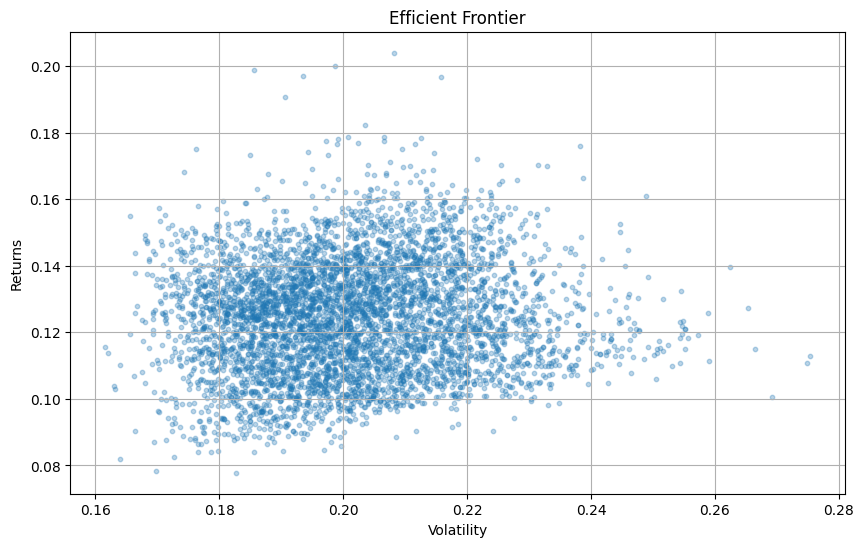

In [62]:
# Plot the efficient frontier
portfolios.plot.scatter(
    x ='Volatility', 
    y ='Returns', 
    marker ='o', 
    s = 10, 
    alpha = 0.3,
    grid=True,
    figsize=(10, 6),
    title='Efficient Frontier'
)

In [65]:
min_vol_portfolio = portfolios.loc[portfolios['Volatility'].idxmin()] # Portfolio with minimum volatility
min_vol_portfolio

Returns        0.115562
Volatility     0.161626
AAPLWeight     0.144939
AMZNWeight     0.017170
BACWeight      0.094235
GOOGLWeight    0.067321
JPMWeight      0.163119
LMTWeight      0.358134
MSFTWeight     0.155082
Name: 1387, dtype: float64

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_24152/1695940876.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_24152/1695940876.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],


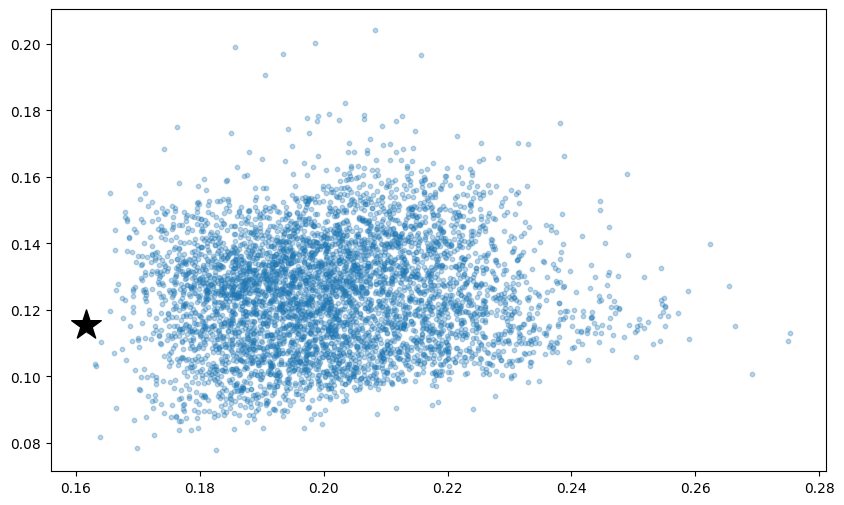

In [74]:
# Plot minimum volatility portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=10, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1], 
    min_vol_portfolio[0], 
    color='black', 
    marker='*', 
    s=500, 
    label='Minimum Volatility Portfolio'
)

In [67]:
# Optimnal Portfolio
rf = 0.01
opt_risk_portfolio = portfolios.iloc[((portfolios['Returns'] - rf) / portfolios['Volatility']).idxmax()] # Portfolio with maximum Sharpe ratio
opt_risk_portfolio

Returns        0.198929
Volatility     0.185642
AAPLWeight     0.007669
AMZNWeight     0.079542
BACWeight      0.023189
GOOGLWeight    0.042528
JPMWeight      0.575991
LMTWeight      0.211748
MSFTWeight     0.059334
Name: 2432, dtype: float64

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_24152/2655051824.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_24152/2655051824.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_24152/2655051824.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  opt_r

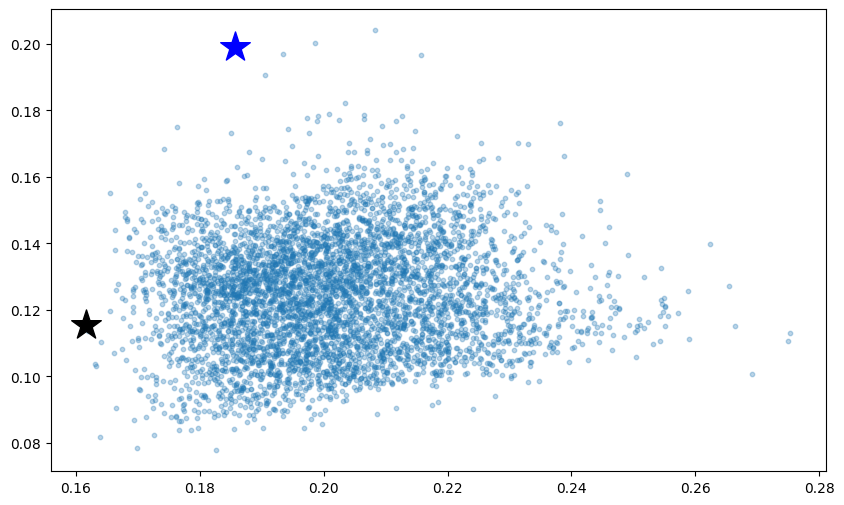

In [77]:
# Plot optimal portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=10, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='*',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    opt_risk_portfolio[1], 
    opt_risk_portfolio[0], 
    color='blue', 
    marker='*', 
    s=500, 
    label='Optimal Risk Portfolio'
)